In [1]:
import os
os.system('cls' if os.name == 'nt' else 'clear') # Clean the console

0

In [2]:
import numpy as np
from keras.models import Sequential
from keras import initializers
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD

In [3]:
input_loc = os.getcwd()

In [4]:
from keras.datasets import mnist
# train_images = mnist.train_images()
# train_labels = mnist.train_labels()
# test_images = mnist.test_images()
# test_labels = mnist.test_labels()

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [7]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [8]:
weight_initializer = initializers.RandomNormal(mean=0.0, stddev=1)
# weight_initializer = 'zeros'
model = Sequential([
  Flatten(),
  Dense(300, activation='sigmoid', kernel_initializer=weight_initializer),
  Dense(200, activation='sigmoid', kernel_initializer=weight_initializer),
  Dense(10, activation='softmax', kernel_initializer=weight_initializer),
])

Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-03-10 21:41:28.895538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 21:41:28.895561: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.compile(SGD(lr=.008), loss='categorical_crossentropy', metrics=['accuracy'])

/Users/mac/miniconda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size=32,
  epochs=20,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/20


2023-03-10 21:41:29.169603: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/mac/miniconda/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2023-03-10 21:41:29.618661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 2.6946 - accuracy: 0.3992

2023-03-10 21:41:44.329786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 8ms/step - loss: 2.6906 - accuracy: 0.3997 - val_loss: 1.4205 - val_accuracy: 0.5666
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 1.2356 - accuracy: 0.6160 - val_loss: 1.0391 - val_accuracy: 0.6712
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9799 - accuracy: 0.6920 - val_loss: 0.8768 - val_accuracy: 0.7271
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8483 - accuracy: 0.7315 - val_loss: 0.7853 - val_accuracy: 0.7552
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7638 - accuracy: 0.7588 - val_loss: 0.7182 - val_accuracy: 0.7767
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7030 - accuracy: 0.7783 - val_loss: 0.6716 - val_accuracy: 0.7916
Epoch 7/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6570 - accuracy: 0.7941 - val_loss: 0.6358 - val_accuracy: 0.8

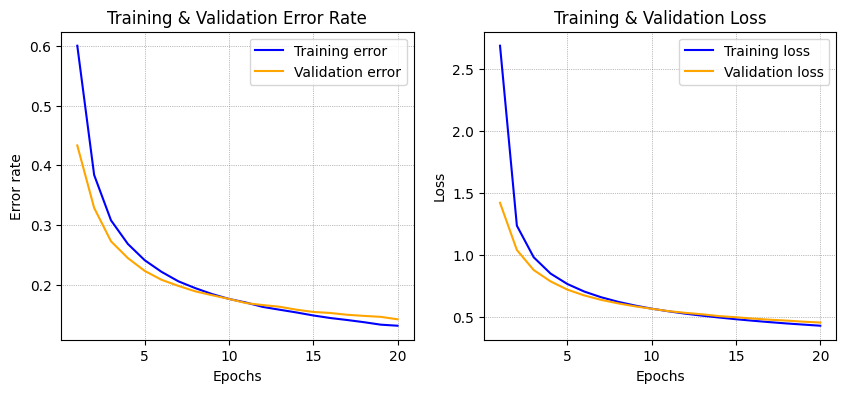

In [11]:
import matplotlib.pyplot as plt

# print(history.history)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
error = 1 - np.asarray(history_dict['accuracy'])
val_error = 1 - np.asarray(history_dict['val_accuracy'])
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, error, 'b', label='Training error')
ax[0].plot(epochs, val_error, 'orange', label='Validation error')
ax[0].set_title('Training & Validation Error Rate')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Error rate')
# ax[0].set_ylim([0,1])
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'orange', label='Validation loss')
ax[1].set_title('Training & Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim([0,2.5])
ax[1].legend()
#
ax[1].grid(color='gray', linestyle=':', linewidth=0.5)
ax[0].grid(color='gray', linestyle=':', linewidth=0.5)
plt.savefig(input_loc + '/hw4_3_4_4b.pdf', format='pdf', bbox_inches='tight') # Must be called before show()